<a href="https://colab.research.google.com/github/sheikh-sahira1703/algo_trading_course/blob/master/Measures%20of%20Risk/Measures_of_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
prices = pd.read_csv('sample_prices.csv')
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [4]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [5]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [6]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64


The numbers which we got by using returns.std() and the numbers which we got by manually calculating are different because the std() uses the denominator which is (n-1) whereas here we are using the denominator which is n.

In other words when we are calculating the mean of the squred deviations, we are dividing by n and while calculting standard deviation, we divide by n-1 not n

Because in the std() function, we are assuming that it is a sample and we are calculating sample standard deviation [Excel = STDEV.S()] as we are assuming that it is a sample from a broader distribution whereas while doing it manually, we are measuring a population standard deviation [Excel = STDEV.P()] where we divide by n





In [7]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [9]:
returns.shape

(12, 2)

In [11]:
number_of_observations = returns.shape[0]
variance = squared_deviations.sum()/(number_of_observations-1)
volatility = np.sqrt(variance)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [12]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [15]:

returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [16]:
returns.std()*(12**0.5)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In Portfolios_Formed_on_ME_monthly_EW

Lo 30 - Lowest 30%

Med 40 - Middle 40%

Hi 30 - Highest 30%

-99.99 = NA

Then they took Hi 30 and equally weighted them and that is called a portfolio and this is the return of that portfolio. 

Then they have taken quintiles 

3.33 means that if you take all the stocks in that universe and you sort them by market cap (in other words the size of that company) and then you take the top 20%, in other words you take this entire list once it is sorted and draw lines so that you have broken them into 5 separate buckets and then you take the highest bucket that is the bucket that consists of the highest cap stocks and then you equally weight those stocks, you treat them as a portfolio and you equally weight them, the returns of that portfolio on that month is what you are seeing here, 3.33

Then instead of dividing them into quintiles, they have equally divided them into deciles 

** Quintiles = 5 divisions, Deciles = 10 divisions **

Universe = universe of US stocks

In [17]:
returns = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values = -99.99)

In [18]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [20]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [21]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [22]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


For the next cell, use the code below if the plot does not show up on executing (you may have to execute it again or use this code)

```
%matplotlib inline
```



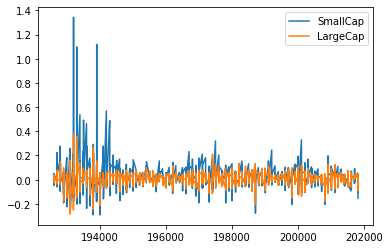

In [23]:
returns.plot.line()

In [24]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [25]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [26]:
returns

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [27]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [28]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [29]:
annualized_return = (return_per_month+1)**12 -1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [31]:
#Doing it in one step
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [33]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [34]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64